In [1]:
import numpy as np
import pandas as pd
from ta.momentum import RSIIndicator
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, RNN, concatenate
from tensorflow.keras.optimizers import RMSprop
from vnstock import *
from ta.volatility import BollingerBands
from tensorflow.keras.layers import Layer
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, Flatten, BatchNormalization
from sklearn.model_selection import RandomizedSearchCV
# from scikeras.wrappers import KerasClassifier

from ta.momentum import StochasticOscillator
from ta.volume import OnBalanceVolumeIndicator
from ta.trend import CCIIndicator
from sklearn.preprocessing import StandardScaler
from ta.volume import ChaikinMoneyFlowIndicator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras import regularizers
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
import keras_tuner as kt
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.saving import register_keras_serializable
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from ta.momentum import RSIIndicator
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, RNN, concatenate
from tensorflow.keras.optimizers import RMSprop
from vnstock import *
from ta.volatility import BollingerBands
from tensorflow.keras.layers import Layer
import tensorflow as tf
from keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, Flatten, BatchNormalization
from sklearn.model_selection import RandomizedSearchCV
# from scikeras.wrappers import KerasClassifier

from ta.momentum import StochasticOscillator
from ta.volume import OnBalanceVolumeIndicator
from ta.trend import CCIIndicator
from sklearn.preprocessing import StandardScaler
from ta.volume import ChaikinMoneyFlowIndicator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras import regularizers
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.saving import register_keras_serializable
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

from selenium import webdriver
from time import sleep
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import random
from collections import Counter
from selenium.webdriver.common.action_chains import ActionChains
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import os

2025-06-09 13:21:52.675956: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-09 13:21:52.682382: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-09 13:21:52.699820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749475312.726853 2315280 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749475312.734315 2315280 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749475312.754314 2315280 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
end_date = '2025-06-04'
end_datetime = datetime.strptime(end_date, '%Y-%m-%d')
start_datetime = end_datetime - timedelta(days=-1)
start_date = start_datetime.strftime('%Y-%m-%d')

stock = Vnstock().stock(symbol='VNINDEX', source='VCI')
stock.quote.history(start=start_date, end=end_date)

2025-06-09 13:21:58 - vnstock.common.data.data_explorer - INFO - Không phải là mã chứng khoán, thông tin công ty và tài chính không khả dụng.


,time,open,high,low,close,volume
0,2025-06-05,1345.74,1347.14,1336.11,1342.09,811579463


In [3]:

def get_previous_and_last_year_quarter(input_date):
    # Lấy tháng và năm từ input_date
    month = input_date.month
    year = input_date.year

    # Xác định quý hiện tại dựa vào tháng
    if 1 <= month <= 3:
        current_quarter = 1
    elif 4 <= month <= 6:
        current_quarter = 2
    elif 7 <= month <= 9:
        current_quarter = 3
    else:
        current_quarter = 4

    # Tìm quý trước đó
    previous_quarter = current_quarter - 1
    previous_year = year

    # Nếu quý trước là 0, thì sẽ chuyển về quý 4 của năm trước
    if previous_quarter == 0:
        previous_quarter = 4
        previous_year -= 1

    # Xác định quý cùng kỳ năm trước
    last_year = previous_year - 1

    # Format kết quả
    previous_quarter_str = f'Q{previous_quarter}-{previous_year}'
    last_year_quarter_str = f'Q{previous_quarter}-{last_year}'

    # return [previous_quarter_str, last_year_quarter_str]
    return previous_quarter, previous_year, last_year

In [4]:
# # Ví dụ sử dụng
# previous_quarter, previous_year, last_year = get_previous_and_last_year_quarter(datetime.date(2024, 1, 10)) #This was changed from datetime.date to datetime.date
# print(previous_quarter, previous_year, last_year)

In [5]:
def get_last_n_quarters(input_date, n=8):
    """
    Trả về danh sách [(quý, năm)] của n quý GẦN NHẤT, không bao gồm quý hiện tại.
    """
    quarters = []
    current_date = pd.to_datetime(input_date)

    # Bắt đầu từ quý TRƯỚC của ngày input
    current_date -= relativedelta(months=3)

    for _ in range(n):
        quarter = (current_date.month - 1) // 3 + 1
        year = current_date.year
        quarters.append((quarter, year))
        current_date -= relativedelta(months=3)

    return quarters

In [6]:
# quarter = get_last_n_quarters(datetime.date(2025, 6, 4), n=8)

In [7]:
# quarter

In [8]:
def get_latest_quarter_end_date(input_date):
    """
    Trả về ngày kết thúc của quý gần nhất TRƯỚC input_date
    """
    input_date = pd.to_datetime(input_date)
    year = input_date.year
    month = input_date.month

    if month <= 3:
        return pd.Timestamp(year=year-1, month=12, day=31)
    elif month <= 6:
        return pd.Timestamp(year=year, month=3, day=31)
    elif month <= 9:
        return pd.Timestamp(year=year, month=6, day=30)
    else:
        return pd.Timestamp(year=year, month=9, day=30)

In [9]:
# a = get_latest_quarter_end_date(datetime.date(2025, 6, 4))

In [10]:
# a

In [11]:
def crawl_stock_data_FA_TA(symbols, start_date, end_date, save_folder='/home/Trong/Agentic_AI/model_ml/crawl_data_production/technical'):
    """
    Crawl dữ liệu lịch sử giá cổ phiếu cho danh sách mã, lưu mỗi mã vào 1 file Excel riêng.

    Parameters:
        symbols (list): Danh sách mã cổ phiếu (ví dụ: ['VCB', 'FPT', 'MWG'])
        start_date (str): Ngày bắt đầu (ví dụ: '2020-01-01')
        end_date (str): Ngày kết thúc (ví dụ: '2025-01-01')
        save_folder (str): Tên thư mục để lưu file Excel (mặc định là 'stock_data')
    """

    # Tạo thư mục lưu file nếu chưa tồn tại
    os.makedirs(save_folder, exist_ok=True)
    indicators = {
    'P/B': ('Chỉ tiêu định giá', 'P/B'),
    'P/E': ('Chỉ tiêu định giá', 'P/E'),
    'P/S': ('Chỉ tiêu định giá', 'P/S'),
    'P/Cash Flow': ('Chỉ tiêu định giá', 'P/Cash Flow'),
    'EPS (VND)': ('Chỉ tiêu định giá', 'EPS (VND)'),
    'BVPS (VND)': ('Chỉ tiêu định giá', 'BVPS (VND)'),
    'EV/EBITDA': ('Chỉ tiêu định giá', 'EV/EBITDA'),
    'ROE (%)': ('Chỉ tiêu khả năng sinh lợi', 'ROE (%)'),
    'ROIC (%)': ('Chỉ tiêu khả năng sinh lợi', 'ROIC (%)'),
    'ROA (%)': ('Chỉ tiêu khả năng sinh lợi', 'ROA (%)'),
}

    for symbol in symbols:
        try:
            print(f"Đang lấy dữ liệu cho: {symbol}...")
            stock = Vnstock().stock(symbol=symbol)
            df = stock.quote.history(start=start_date, end=end_date)
            finance_data = stock.finance.ratio(period='quarter', lang='vi', dropna=True)

            for index, row in df.iterrows():
                input_date = row['time']
                prev_quarter, prev_year, year_before = get_previous_and_last_year_quarter(input_date)

                for name, multi_idx in indicators.items():
                    col_prev = f"{name}_Previous_Quarter"
                    col_last_year = f"{name}_Same_Period_Last_Year"

                    # Giá trị quý trước
                    try:
                        value_prev = finance_data.loc[
                            (finance_data[('Meta', 'Năm')].astype(str) == str(prev_year)) &
                            (finance_data[('Meta', 'Kỳ')].astype(str) == str(prev_quarter)),
                            multi_idx
                        ].values
                        df.at[index, col_prev] = value_prev[0] if len(value_prev) > 0 else None
                    except:
                        df.at[index, col_prev] = None

                    # Giá trị cùng kỳ năm trước
                    try:
                        value_last_year = finance_data.loc[
                            (finance_data[('Meta', 'Năm')].astype(str) == str(year_before)) &
                            (finance_data[('Meta', 'Kỳ')].astype(str) == str(prev_quarter)),
                            multi_idx
                        ].values
                        df.at[index, col_last_year] = value_last_year[0] if len(value_last_year) > 0 else None
                    except:
                        df.at[index, col_last_year] = None

                    # Thêm 8 quý gần nhất
                    recent_quarters = get_last_n_quarters(input_date, n=8)
                    for i, (q, y) in enumerate(recent_quarters):
                        col_recent = f"{name}_d_{i+1}"
                        try:
                            value = finance_data.loc[
                                (finance_data[('Meta', 'Năm')].astype(str) == str(y)) &
                                (finance_data[('Meta', 'Kỳ')].astype(str) == str(q)),
                                multi_idx
                            ].values
                            df.at[index, col_recent] = value[0] if len(value) > 0 else 0
                        except:
                            df.at[index, col_recent] = 0
                    # Tính khoảng cách từ input_date đến cuối quý gần nhất
                    try:
                        end_of_last_quarter = get_latest_quarter_end_date(input_date)
                        distance = (pd.to_datetime(input_date) - end_of_last_quarter).days
                        df.at[index, 'distance_to_nearest_quarter'] = distance
                    except:
                        df.at[index, 'distance_to_nearest_quarter'] = None

            df['ticket'] = symbol  # 👉 Thêm cột 'ticket'
            file_path = os.path.join(save_folder, f"{symbol}.xlsx")
            df.to_excel(file_path, index=False)
            print(f"✅ Đã lưu dữ liệu {symbol} vào {file_path}")
            return df

        except Exception as e:
            print(f"❌ Lỗi khi xử lý mã {symbol}: {e}")

In [12]:
def crawl_stock_data_TA(symbols, start_date, end_date, save_folder='/home/Trong/Agentic_AI/model_ml/crawl_data_production/technical'):
    """
    Crawl dữ liệu lịch sử giá cổ phiếu cho danh sách mã, lưu mỗi mã vào 1 file Excel riêng.

    Parameters:
        symbols (list): Danh sách mã cổ phiếu (ví dụ: ['VCB', 'FPT', 'MWG'])
        start_date (str): Ngày bắt đầu (ví dụ: '2020-01-01')
        end_date (str): Ngày kết thúc (ví dụ: '2025-01-01')
        save_folder (str): Tên thư mục để lưu file Excel (mặc định là 'stock_data')
    """

    # Tạo thư mục lưu file nếu chưa tồn tại
    os.makedirs(save_folder, exist_ok=True)

    for symbol in symbols:
        try:
            print(f"Đang lấy dữ liệu cho: {symbol}...")
            stock = Vnstock().stock(symbol=symbol)
            df = stock.quote.history(start=start_date, end=end_date)
            # finance_data = stock.finance.ratio(period='quarter', lang='vi', dropna=True)


            df['ticket'] = symbol  # 👉 Thêm cột 'ticket'
            file_path = os.path.join(save_folder, f"{symbol}.xlsx")
            df.to_excel(file_path, index=False)
            print(f"✅ Đã lưu dữ liệu {symbol} vào {file_path}")
            return df

        except Exception as e:
            print(f"❌ Lỗi khi xử lý mã {symbol}: {e}")

In [13]:
# crawl train data
df = crawl_stock_data_FA_TA(['ACB'], start_date='2022-09-04', end_date='2024-06-03', save_folder='/home/Trong/Agentic_AI/model_ml/crawl_data_production/technical')

Đang lấy dữ liệu cho: ACB...


Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfr

✅ Đã lưu dữ liệu ACB vào /home/Trong/Agentic_AI/model_ml/crawl_data_production/technical/ACB.xlsx


In [14]:
df

,time,open,high,low,close,volume,P/B_Previous_Quarter,P/B_Same_Period_Last_Year,P/B_d_1,P/B_d_2,...,ROA (%)_Same_Period_Last_Year,ROA (%)_d_1,ROA (%)_d_2,ROA (%)_d_3,ROA (%)_d_4,ROA (%)_d_5,ROA (%)_d_6,ROA (%)_d_7,ROA (%)_d_8,ticket
0,2022-09-05,14.39,14.51,14.33,14.36,2307700,1.294123,2.181351,1.294123,1.681594,...,0.021739,0.022625,0.020741,0.019753,0.021086,0.021739,0.020190,0.018557,0.016849,ACB
1,2022-09-06,14.36,14.48,14.33,14.45,2405200,1.294123,2.181351,1.294123,1.681594,...,0.021739,0.022625,0.020741,0.019753,0.021086,0.021739,0.020190,0.018557,0.016849,ACB
2,2022-09-07,14.36,14.42,14.25,14.25,3214400,1.294123,2.181351,1.294123,1.681594,...,0.021739,0.022625,0.020741,0.019753,0.021086,0.021739,0.020190,0.018557,0.016849,ACB
3,2022-09-08,14.30,14.33,14.07,14.07,2080700,1.294123,2.181351,1.294123,1.681594,...,0.021739,0.022625,0.020741,0.019753,0.021086,0.021739,0.020190,0.018557,0.016849,ACB
4,2022-09-09,14.19,14.19,13.92,14.07,2227900,1.294123,2.181351,1.294123,1.681594,...,0.021739,0.022625,0.020741,0.019753,0.021086,0.021739,0.020190,0.018557,0.016849,ACB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,2024-05-29,20.84,20.88,20.53,20.53,13456310,1.433330,1.357209,1.433330,1.532689,...,0.025019,0.023211,0.024188,0.023869,0.023986,0.025019,0.024106,0.024516,0.022625,ACB
432,2024-05-30,20.46,20.63,20.25,20.63,13118384,1.433330,1.357209,1.433330,1.532689,...,0.025019,0.023211,0.024188,0.023869,0.023986,0.025019,0.024106,0.024516,0.022625,ACB
433,2024-05-31,20.89,21.14,20.60,20.60,11139289,1.433330,1.357209,1.433330,1.532689,...,0.025019,0.023211,0.024188,0.023869,0.023986,0.025019,0.024106,0.024516,0.022625,ACB
434,2024-06-03,20.76,20.85,20.55,20.72,16257238,1.433330,1.357209,1.433330,1.532689,...,0.025019,0.023211,0.024188,0.023869,0.023986,0.025019,0.024106,0.024516,0.022625,ACB


In [15]:
df_vnd = crawl_stock_data_TA(['VNINDEX'], start_date='2022-09-04', end_date='2024-06-03', save_folder='/home/Trong/Agentic_AI/model_ml/crawl_data_production/technical')

2025-06-09 13:22:51 - vnstock.common.data.data_explorer - INFO - Không phải là mã chứng khoán, thông tin công ty và tài chính không khả dụng.


Đang lấy dữ liệu cho: VNINDEX...
✅ Đã lưu dữ liệu VNINDEX vào /home/Trong/Agentic_AI/model_ml/crawl_data_production/technical/VNINDEX.xlsx


In [16]:
df_vnd

,time,open,high,low,close,volume,ticket
0,2022-09-05,1280.34,1285.70,1275.35,1277.35,466166300,VNINDEX
1,2022-09-06,1279.58,1286.92,1277.40,1277.40,537987600,VNINDEX
2,2022-09-07,1274.68,1275.07,1243.17,1243.17,796593600,VNINDEX
3,2022-09-08,1251.22,1251.36,1234.60,1234.60,557779800,VNINDEX
4,2022-09-09,1241.26,1248.78,1228.54,1248.78,542039800,VNINDEX
...,...,...,...,...,...,...,...
431,2024-05-29,1281.73,1285.63,1271.60,1272.64,1072465256,VNINDEX
432,2024-05-30,1267.62,1269.07,1251.80,1266.32,1050581949,VNINDEX
433,2024-05-31,1268.86,1271.07,1261.43,1261.72,771151605,VNINDEX
434,2024-06-03,1272.37,1284.48,1271.65,1280.00,1046924676,VNINDEX


In [17]:
def load_stock(symbol, folder_path='/home/Trong/Agentic_AI/model_ml/crawl_data_production/technical'):
    """
    Load dữ liệu cổ phiếu từ mã cổ phiếu, sử dụng đường dẫn thư mục cố định.

    Parameters:
        symbol (str): Mã cổ phiếu (ví dụ: 'VCB')
        folder_path (str): Thư mục chứa file Excel (mặc định là 'stock_data')

    Returns:
        DataFrame chứa dữ liệu cổ phiếu.
    """
    file_path = os.path.join(folder_path, f"{symbol}.xlsx")

    if not os.path.exists(file_path):
        raise FileNotFoundError(f"❌ Không tìm thấy file: {file_path}")

    try:
        df = pd.read_excel(file_path)
        print(f"✅ Đã load dữ liệu cho mã: {symbol}")
        return df
    except Exception as e:
        print(f"❌ Lỗi khi load dữ liệu {symbol}: {e}")
        return pd.DataFrame()

In [18]:
def load_and_process_data(symbol, drop_na=True, folder_path = '/home/Trong/Agentic_AI/model_ml/crawl_data_production/technical'):
    data = load_stock(symbol,folder_path)
    print(data.head())
    if data.empty:
        return None

    df = data

    columns_to_drop = ['EV/EBITDA_Previous_Quarter','EV/EBITDA_Same_Period_Last_Year','ROIC (%)_Previous_Quarter','ROIC (%)_Same_Period_Last_Year']  # thay bằng danh sách cột bạn muốn xóa
    df.drop(columns=columns_to_drop, inplace=True)

     # Tính toán khối lượng trung bình
    volume_ma_period = 20  # Ví dụ: khối lượng trung bình 20 ngày
    df['volume_ma'] = df['volume'].rolling(window=volume_ma_period).mean()


    # Tính tỷ lệ khối lượng hiện tại / khối lượng trung bình
    df['volume_to_volume_ma_ratio'] = df['volume'] / df['volume_ma']


    # Tính toán EMA ngắn hạn (12 ngày)
    df['ema_12'] = df['close'].ewm(span=12, adjust=False).mean()


    # Tính toán EMA dài hạn (26 ngày)
    df['ema_26'] = df['close'].ewm(span=26, adjust=False).mean()

    # Tính toán SMA trung hạn (20 ngày)
    df['sma_20'] = df['close'].rolling(window=20).mean()

    # Tính toán SMA dài hạn (50 ngày)
    df['sma_50'] = df['close'].rolling(window=50).mean()

     # Tính toán ROC

    # df['roc_1'] = ((df['close'] - df['close'].shift(1)) / df['close'].shift(1)) * 100
    df['roc_5'] = ((df['close'] - df['close'].shift(5)) / df['close'].shift(5)) * 100
    # df['roc_9'] = ((df['close'] - df['close'].shift(9)) / df['close'].shift(9)) * 100

    # Tính toán %K (Stochastic Oscillator)
    stoch_period = 14
    df['%K'] = ((df['close'] - df['low'].rolling(window=stoch_period).min()) /
                (df['high'].rolling(window=stoch_period).max() - df['low'].rolling(window=stoch_period).min())) * 100

    # Tính toán %R (Williams %R)
    df['%R'] = ((df['high'].rolling(window=stoch_period).max() - df['close']) /
                (df['high'].rolling(window=stoch_period).max() - df['low'].rolling(window=stoch_period).min())) * -100

    # Tính toán CCI (Commodity Channel Index)
    cci_period = 20
    df['typical_price'] = (df['high'] + df['low'] + df['close']) / 3
    df['cci'] = CCIIndicator(high=df['high'], low=df['low'], close=df['close'], window=cci_period).cci()

    # Tính toán OBV (On Balance Volume)
    df['obv'] = OnBalanceVolumeIndicator(close=df['close'], volume=df['volume']).on_balance_volume()


    # Tính toán MACD
    df['macd'] = df['ema_12'] - df['ema_26']
    # Tính toán Signal line (EMA 9 ngày của MACD)
    df['signal_line'] = df['macd'].ewm(span=9, adjust=False).mean()
    # Tính toán MACD histogram
    df['macd_histogram'] = df['macd'] - df['signal_line']


    # Tính toán RSI
    rsi_period = 14
    df['rsi'] = RSIIndicator(df['close'], window=rsi_period).rsi()


    # Bollinger Bands
    indicator_bb = BollingerBands(close=df['close'], window=20, window_dev=2)
    df['bb_bbm'] = indicator_bb.bollinger_mavg()
    df['bb_bbh'] = indicator_bb.bollinger_hband()
    df['bb_bbl'] = indicator_bb.bollinger_lband()
    df['bb_bbp'] = indicator_bb.bollinger_pband()

    df['bb_bbh_bb_bbl_ratio'] = df['bb_bbh'] / df['bb_bbl']

    # =======================================================================

    # 1. Daily log return
    df['log_return'] = np.log(df['close'] / df['close'].shift(1))

    # 2. Rolling volatility (biến động trượt)
    for window in [5, 10, 20, 30]:
        df[f'volatility_{window}d'] = df['log_return'].rolling(window=window).std()

    # 3. Rolling mean log return
    for window in [5, 10, 20, 30]:
        df[f'mean_log_return_{window}d'] = df['log_return'].rolling(window=window).mean()

    # 4. Sharpe-like ratio (mean return / volatility)
    for window in [5, 10, 20, 30]:
        mean_col = f'mean_log_return_{window}d'
        vol_col = f'volatility_{window}d'
        df[f'sharpe_like_{window}d'] = df[mean_col] / (df[vol_col] + 1e-9)

    # 5. Directional Feature - chuỗi ngày tăng liên tiếp
    df['up_streak'] = (df['log_return'] > 0).astype(int)
    df['up_streak'] = df['up_streak'] * (df['up_streak'].groupby((df['up_streak'] != df['up_streak'].shift()).cumsum()).cumcount() + 1)
    df['up_streak'] = df['up_streak'].where(df['log_return'] > 0, 0)

    # 6. Tỷ lệ ngày log return dương trong 20 ngày gần nhất
    df['pos_log_return_ratio_20d'] = df['log_return'].rolling(window=20).apply(lambda x: np.mean(x > 0), raw=True)

    # 7. Z-score của log return hiện tại
    for window in [5, 10, 20, 30]:
        mean_col = f'mean_log_return_{window}d'
        vol_col = f'volatility_{window}d'
        df[f'z_score_{window}d'] = (df['log_return'] - df[mean_col]) / (df[vol_col] + 1e-9)



    # Tính Annual Return (lợi nhuận hàng năm)
    df['annual_return'] = df['close'] / df['close'].shift(252) - 1  # 252 ngày giao dịch trong năm

    # Tính Volatility (Độ biến động) hàng năm (Standard Deviation of Returns)
    df['daily_return'] = df['close'].pct_change()  # Tỷ suất lợi nhuận hàng ngày
    df['annual_volatility'] = df['daily_return'].rolling(window=252).std() * (252 ** 0.5)  # Độ lệch chuẩn hàng năm (tính từ tỷ suất lợi nhuận hàng ngày)

    risk_free_rate = 0.03  # tương đương 3%/năm
    # Tính Sharpe ratio: (Rp - Rf) / Volatility
    df['sharpe_ratio'] = (df['annual_return'] - risk_free_rate) / df['annual_volatility']


    # Tính toán chỉ số cơ bản ==========================================================
    df['P/B_change_rate_flag'] = np.where(df['P/B_Same_Period_Last_Year'] == 0, 1, 0)
    df['P/B_change_rate'] = np.where(
        df['P/B_Same_Period_Last_Year'] != 0,
        (df['P/B_Previous_Quarter'] - df['P/B_Same_Period_Last_Year']) / df['P/B_Same_Period_Last_Year'],
        999
    )

    # P/E
    df['P/E_change_rate_flag'] = np.where(df['P/E_Same_Period_Last_Year'] == 0, 1, 0)
    df['P/E_change_rate'] = np.where(
        df['P/E_Same_Period_Last_Year'] != 0,
        (df['P/E_Previous_Quarter'] - df['P/E_Same_Period_Last_Year']) / df['P/E_Same_Period_Last_Year'],
        999
    )

    # P/S
    df['P/S_change_rate_flag'] = np.where(df['P/S_Same_Period_Last_Year'] == 0, 1, 0)
    df['P/S_change_rate'] = np.where(
        df['P/S_Same_Period_Last_Year'] != 0,
        (df['P/S_Previous_Quarter'] - df['P/S_Same_Period_Last_Year']) / df['P/S_Same_Period_Last_Year'],
        999
    )

    # P/Cash Flow
    df['P/Cash Flow_change_rate_flag'] = np.where(df['P/Cash Flow_Same_Period_Last_Year'] == 0, 1, 0)
    df['P/Cash Flow_change_rate'] = np.where(
        df['P/Cash Flow_Same_Period_Last_Year'] != 0,
        (df['P/Cash Flow_Previous_Quarter'] - df['P/Cash Flow_Same_Period_Last_Year']) / df['P/Cash Flow_Same_Period_Last_Year'],
        999
    )

    # EPS (VND)
    df['EPS (VND)_change_rate_flag'] = np.where(df['EPS (VND)_Same_Period_Last_Year'] == 0, 1, 0)
    df['EPS (VND)_change_rate'] = np.where(
        df['EPS (VND)_Same_Period_Last_Year'] != 0,
        (df['EPS (VND)_Previous_Quarter'] - df['EPS (VND)_Same_Period_Last_Year']) / df['EPS (VND)_Same_Period_Last_Year'],
        999
    )

    # BVPS (VND)
    df['BVPS (VND)_change_rate_flag'] = np.where(df['BVPS (VND)_Same_Period_Last_Year'] == 0, 1, 0)
    df['BVPS (VND)_change_rate'] = np.where(
        df['BVPS (VND)_Same_Period_Last_Year'] != 0,
        (df['BVPS (VND)_Previous_Quarter'] - df['BVPS (VND)_Same_Period_Last_Year']) / df['BVPS (VND)_Same_Period_Last_Year'],
        999
    )

    # ROE (%)
    df['ROE (%)_change_rate_flag'] = np.where(df['ROE (%)_Same_Period_Last_Year'] == 0, 1, 0)
    df['ROE (%)_change_rate'] = np.where(
        df['ROE (%)_Same_Period_Last_Year'] != 0,
        (df['ROE (%)_Previous_Quarter'] - df['ROE (%)_Same_Period_Last_Year']) / df['ROE (%)_Same_Period_Last_Year'],
        999
    )

    # ROA (%)
    df['ROA (%)_change_rate_flag'] = np.where(df['ROA (%)_Same_Period_Last_Year'] == 0, 1, 0)
    df['ROA (%)_change_rate'] = np.where(
        df['ROA (%)_Same_Period_Last_Year'] != 0,
        (df['ROA (%)_Previous_Quarter'] - df['ROA (%)_Same_Period_Last_Year']) / df['ROA (%)_Same_Period_Last_Year'],
        999
    )

    # ==================================================================================================


    # Xứ lý với VNINDEX =============================================================================
    data_time = data['time']

    data_vnd = load_stock('VNINDEX', folder_path)
    print(data_vnd)
    data_vnd = data_vnd.drop(columns=['ticket'])
    data_vnd.columns = ['time','open_vnd', 'high_vnd', 'low_vnd', 'close_vnd', 'volume_vnd']



    # Tính toán RSI
    rsi_period = 14
    data_vnd['rsi_vnd'] = RSIIndicator(data_vnd['close_vnd'], window=rsi_period).rsi()
    # Tính toán RSI-base-MA
    ma_period = 9
    data_vnd['rsi_base_ma_vnd'] = data_vnd['rsi_vnd'].rolling(window=ma_period).mean()
    data_vnd['rsi_rsi_base_ma_ratio_vnd'] = data_vnd['rsi_vnd'] / data_vnd['rsi_base_ma_vnd']

    # Tính toán khối lượng trung bình
    volume_ma_period = 20  # Ví dụ: khối lượng trung bình 20 ngày
    data_vnd['volume_ma_vnd'] = data_vnd['volume_vnd'].rolling(window=volume_ma_period).mean()
    # Tính tỷ lệ khối lượng hiện tại / khối lượng trung bình
    data_vnd['volume_to_volume_ma_ratio_vnd'] = data_vnd['volume_vnd'] / data_vnd['volume_ma_vnd']

    # Bollinger Bands
    indicator_bb = BollingerBands(close=data_vnd['close_vnd'], window=20, window_dev=2)
    data_vnd['bb_bbm_vnd'] = indicator_bb.bollinger_mavg()
    data_vnd['bb_bbh_vnd'] = indicator_bb.bollinger_hband()
    data_vnd['bb_bbl_vnd'] = indicator_bb.bollinger_lband()
    data_vnd['bb_bbp_vnd'] = indicator_bb.bollinger_pband()

    data_vnd['bb_bbh_bb_bbl_ratio_vnd'] = data_vnd['bb_bbh_vnd'] / data_vnd['bb_bbl_vnd']

    # Tính toán ROC
    roc_period = 9  # Chu kỳ 9 ngày, bạn có thể thay đổi tùy ý
    data_vnd['roc_vnd'] = ((data_vnd['close_vnd'] - data_vnd['close_vnd'].shift(roc_period)) / data_vnd['close_vnd'].shift(roc_period)) * 100

    # Tính toán %K (Stochastic Oscillator)
    stoch_period = 14
    data_vnd['%K_vnd'] = ((data_vnd['close_vnd'] - data_vnd['low_vnd'].rolling(window=stoch_period).min()) /
                (data_vnd['high_vnd'].rolling(window=stoch_period).max() - data_vnd['low_vnd'].rolling(window=stoch_period).min())) * 100

    # Tính toán %R (Williams %R)
    data_vnd['%R_vnd'] = ((data_vnd['high_vnd'].rolling(window=stoch_period).max() - data_vnd['close_vnd']) /
                (data_vnd['high_vnd'].rolling(window=stoch_period).max() - data_vnd['low_vnd'].rolling(window=stoch_period).min())) * -100

    # Tính toán CCI (Commodity Channel Index)
    cci_period = 20
    data_vnd['typical_price_vnd'] = (data_vnd['high_vnd'] + data_vnd['low_vnd'] + data_vnd['close_vnd']) / 3
    data_vnd['cci_vnd'] = CCIIndicator(high=data_vnd['high_vnd'], low=data_vnd['low_vnd'], close=data_vnd['close_vnd'], window=cci_period).cci()

    # Tính toán OBV (On Balance Volume)
    data_vnd['obv_vnd'] = OnBalanceVolumeIndicator(close=data_vnd['close_vnd'], volume=data_vnd['volume_vnd']).on_balance_volume()

    # Tính toán EMA ngắn hạn (12 ngày)
    data_vnd['ema_12_vnd'] = data_vnd['close_vnd'].ewm(span=12, adjust=False).mean()

    # Tính toán EMA dài hạn (26 ngày)
    data_vnd['ema_26_vnd'] = data_vnd['close_vnd'].ewm(span=26, adjust=False).mean()

    # Tính toán SMA trung hạn (20 ngày)
    data_vnd['sma_20_vnd'] = data_vnd['close_vnd'].rolling(window=20).mean()

    # Tính toán SMA dài hạn (50 ngày)
    data_vnd['sma_50_vnd'] = data_vnd['close_vnd'].rolling(window=50).mean()

    data_vnd['time'] = pd.to_datetime(data_vnd['time']).dt.date
    # merge
    df['time'] = pd.to_datetime(df['time']).dt.date
    df = pd.merge(df, data_vnd, on='time')


     # Tính tỷ lệ thay đổi giá
    threshold=0.01
    df['change'] = (df['close'].shift(-1) - df['close']) / df['close']

    # Gán nhãn
    df['target'] = 0  # Hold mặc định
    df.loc[df['change'] > threshold, 'target'] = 1   # Buy
    df.loc[df['change'] < -threshold, 'target'] = 2  # Sell

    if drop_na:
        df.dropna(inplace=True)

    print(df.head())
    return df

In [19]:
def add_slope_features(df, feature_base_names, n=8):
    """
    Với mỗi dòng trong df, tính hệ số gốc (slope) của đường hồi quy tuyến tính theo thời gian
    cho từng feature trong danh sách feature_base_names dựa trên các giá trị 8 quý gần nhất.

    Args:
        df (pd.DataFrame): DataFrame chứa các cột dạng 'feature_d_1' đến 'feature_d_n'.
        feature_base_names (list): Danh sách tên feature cơ bản (string).
        n (int): Số quý gần nhất để tính trend (mặc định 8).

    Returns:
        pd.DataFrame: DataFrame đã thêm các cột hệ số gốc tương ứng.
    """
    for feature in feature_base_names:
        col_name = f"coefficient_{feature}"
        if col_name not in df.columns:
            df[col_name] = np.nan

    # Duyệt từng hàng
    for index, row in df.iterrows():
        for feature in feature_base_names:
            y_values = []
            for i in range(n, 0, -1):  # d_8, ..., d_1
                val = row.get(f"{feature}_d_{i}", np.nan)
                y_values.append(val)

            y_values = np.array(y_values, dtype=float)

            # Cần ít nhất 2 điểm hợp lệ để fit mô hình
            if np.isnan(y_values).sum() > (n - 2):
                coef = np.nan
            else:
                X = np.arange(n).reshape(-1, 1)
                mask = ~np.isnan(y_values)
                model = LinearRegression()
                model.fit(X[mask], y_values[mask])
                coef = model.coef_[0]

            df.at[index, f"coefficient_{feature}"] = coef

    return df

In [20]:
def fn_load_and_process_data(symbol, drop_na=True, folder_path = ''):
  df = load_and_process_data(symbol, drop_na, folder_path)
  # print(df.head())
  feature_base_names = ['P/B','P/E','P/S','P/Cash Flow','EPS (VND)','BVPS (VND)','ROE (%)','ROA (%)']
  df = add_slope_features(df, feature_base_names)
  return df

In [21]:
df_vhm_process = fn_load_and_process_data("ACB", folder_path= '/home/Trong/Agentic_AI/model_ml/crawl_data_production/technical')

✅ Đã load dữ liệu cho mã: ACB
        time   open   high    low  close   volume  P/B_Previous_Quarter  \
0 2022-09-05  14.39  14.51  14.33  14.36  2307700              1.294123   
1 2022-09-06  14.36  14.48  14.33  14.45  2405200              1.294123   
2 2022-09-07  14.36  14.42  14.25  14.25  3214400              1.294123   
3 2022-09-08  14.30  14.33  14.07  14.07  2080700              1.294123   
4 2022-09-09  14.19  14.19  13.92  14.07  2227900              1.294123   

   P/B_Same_Period_Last_Year   P/B_d_1   P/B_d_2  ...  \
0                   2.181351  1.294123  1.681594  ...   
1                   2.181351  1.294123  1.681594  ...   
2                   2.181351  1.294123  1.681594  ...   
3                   2.181351  1.294123  1.681594  ...   
4                   2.181351  1.294123  1.681594  ...   

   ROA (%)_Same_Period_Last_Year  ROA (%)_d_1  ROA (%)_d_2  ROA (%)_d_3  \
0                       0.021739     0.022625     0.020741     0.019753   
1                       0.

In [22]:
df_vhm_process

,time,open,high,low,close,volume,P/B_Previous_Quarter,P/B_Same_Period_Last_Year,P/B_d_1,P/B_d_2,...,change,target,coefficient_P/B,coefficient_P/E,coefficient_P/S,coefficient_P/Cash Flow,coefficient_EPS (VND),coefficient_BVPS (VND),coefficient_ROE (%),coefficient_ROA (%)
252,2023-09-07,16.14,16.25,15.97,16.07,9860968,1.402448,1.294123,1.402448,1.357209,...,-0.006223,0,-0.093406,-0.562918,-0.136343,0.029717,22.299401,128.845392,0.001440,0.000698
253,2023-09-08,16.07,16.11,15.93,15.97,5530112,1.402448,1.294123,1.402448,1.357209,...,-0.017533,2,-0.093406,-0.562918,-0.136343,0.029717,22.299401,128.845392,0.001440,0.000698
254,2023-09-11,16.00,16.07,15.62,15.69,10542303,1.402448,1.294123,1.402448,1.357209,...,0.017846,1,-0.093406,-0.562918,-0.136343,0.029717,22.299401,128.845392,0.001440,0.000698
255,2023-09-12,15.69,15.97,15.58,15.97,6685987,1.402448,1.294123,1.402448,1.357209,...,-0.008766,0,-0.093406,-0.562918,-0.136343,0.029717,22.299401,128.845392,0.001440,0.000698
256,2023-09-13,15.97,16.00,15.76,15.83,6942929,1.402448,1.294123,1.402448,1.357209,...,-0.004422,0,-0.093406,-0.562918,-0.136343,0.029717,22.299401,128.845392,0.001440,0.000698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,2024-05-28,20.84,20.84,20.56,20.81,10694176,1.433330,1.357209,1.433330,1.532689,...,-0.013455,2,0.018317,0.135051,0.073103,-0.231400,-20.302100,213.390954,-0.003806,0.000009
431,2024-05-29,20.84,20.88,20.53,20.53,13456310,1.433330,1.357209,1.433330,1.532689,...,0.004871,0,0.018317,0.135051,0.073103,-0.231400,-20.302100,213.390954,-0.003806,0.000009
432,2024-05-30,20.46,20.63,20.25,20.63,13118384,1.433330,1.357209,1.433330,1.532689,...,-0.001454,0,0.018317,0.135051,0.073103,-0.231400,-20.302100,213.390954,-0.003806,0.000009
433,2024-05-31,20.89,21.14,20.60,20.60,11139289,1.433330,1.357209,1.433330,1.532689,...,0.005825,0,0.018317,0.135051,0.073103,-0.231400,-20.302100,213.390954,-0.003806,0.000009


In [23]:
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.binary_location = "/usr/bin/google-chrome"

In [24]:
service = Service("/usr/bin/chromedriver")
browser = webdriver.Chrome(service=service, options=options)

In [25]:
def craw_stock_news(ticker, start_date, end_date, roof_path):
  df = pd.DataFrame(data = None, columns = ['ticker','time', 'tittle', 'url'])
  browser.get("https://cafef.vn/du-lieu/tin-doanh-nghiep/"+str(ticker)+"/event.chn")
  print(browser.title)
  flag = True
  while (flag):
    li_elements = browser.find_elements(By.XPATH, "//div[@id='divEvents']/ul/li")
    for idx, li in enumerate(li_elements, start= 1):
      span = li.find_element(By.TAG_NAME, "span")
      curent_date_of_new = span.text
      curent_date_of_new_convert = datetime.strptime(curent_date_of_new, "%d/%m/%Y %H:%M")
      if (curent_date_of_new_convert < start_date):
        print("Đã hết thời gian cần tìm")
        flag = False
        break
      if curent_date_of_new_convert >= start_date and curent_date_of_new_convert <= end_date:
        time = curent_date_of_new
        url = li.find_element(By.TAG_NAME, "a").get_attribute('href')
        title = li.find_element(By.TAG_NAME, "a").text
        print('Đang lấy bài báo với thông tin như sau: ')
        print(time)
        print(title)
        print(url)
        new_row = {'ticker': ticker, 'time':time, 'tittle': title, 'url':url}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
      if (idx == len(li_elements)):
        print("Đây là phần tử cuối cùng")
        # Click vào nút xem tiếp
        try:
          btn_next_element = browser.find_element(By.XPATH, "//span[@id='spanNext']/a")
          browser.execute_script("arguments[0].click();", btn_next_element)
          sleep(random.uniform(1, 2))
          print("Cuyển qua trang tiếp theo")
        except Exception as e:
          print(f"Không thể click nút tiếp: {e}")
          flag = False
          break
  # Tạo thư mục nếu chưa tồn tại
  os.makedirs(roof_path, exist_ok=True)
  file_path = roof_path + "/" + str(ticker) + ".xlsx"
  with pd.ExcelWriter(file_path, engine='openpyxl', mode='w') as writer:
    df.to_excel(writer, sheet_name='Sheet1', index=False)
  print("Đã lưu file excel cho cổ phiếu " + str(ticker))
  # 5. Đóng browser
  # browser.close()

In [26]:
from datetime import datetime

In [27]:
end_date = datetime.strptime('04/06/2025 00:00', "%d/%m/%Y %H:%M")
start_date = datetime.strptime('01/06/2022 00:00', "%d/%m/%Y %H:%M")

In [28]:
craw_stock_news("ACB", start_date, end_date, roof_path="/home/Trong/Agentic_AI/model_ml/crawl_data_production/sentiment")

ACB : Tin tức doanh nghiệp niêm yết | CafeF.vn
Đang lấy bài báo với thông tin như sau: 
02/06/2025 00:00
ACB: Nghị quyết HĐQT về phương án phát hành trái phiếu riêng lẻ lần 2.2025
https://cafef.vn/du-lieu/ACB-2212106/acb-nghi-quyet-hdqt-ve-phuong-an-phat-hanh-trai-phieu-rieng-le-lan-22025.chn
Đang lấy bài báo với thông tin như sau: 
02/06/2025 00:00
ACB: Đã phát hành 669.998.687 cổ phiếu để trả cổ tức
https://cafef.vn/du-lieu/ACB-2212109/acb-da-phat-hanh-669998687-co-phieu-de-tra-co-tuc.chn
Đang lấy bài báo với thông tin như sau: 
29/05/2025 00:00
ACB: Số lượng cổ phiếu có quyền biểu quyết đang lưu hành là 5.136.656.599 cp
https://cafef.vn/du-lieu/ACB-2211324/acb-so-luong-co-phieu-co-quyen-bieu-quyet-dang-luu-hanh-la-5136656599-cp.chn
Đang lấy bài báo với thông tin như sau: 
20/05/2025 00:00
ACB: Các Nghị quyết HĐQT giữa ACB với ACBS và ACBL
https://cafef.vn/du-lieu/ACB-2203460/acb-cac-nghi-quyet-hdqt-giua-acb-voi-acbs-va-acbl.chn
Đang lấy bài báo với thông tin như sau: 
16/05/2025 00:

In [29]:
def compute_sentiment_norm(sentiment_df):
    # Xác định các cột khía cạnh cảm xúc (giả sử các cột này có tên như dưới)
    sentiment_columns = ['Reputation', 'Financial', 'Regulatory', 'Risks',
                         'Fundamentals', 'Conditions', 'Market', 'Volatility']

    # Đảm bảo các cột này đều tồn tại trong DataFrame
    existing_columns = [col for col in sentiment_columns if col in sentiment_df.columns]

    # Thay NaN bằng 0 nếu chưa làm
    sentiment_df[existing_columns] = sentiment_df[existing_columns].fillna(0)

    # Tính Euclidean norm cho từng hàng
    sentiment_df['euclidean norm'] = np.linalg.norm(sentiment_df[existing_columns].values, axis=1)

    return sentiment_df

In [30]:
def apply_sentiment_for_ta_fa(symbol, ta_fa_data_folder_path, sentiment_data_folder_path, destination_folder_path, drop_na=True):
    ta_fa_df = fn_load_and_process_data(symbol, drop_na, ta_fa_data_folder_path)
    ta_fa_df.reset_index(drop=True, inplace=True)
    sentiment_df = pd.read_excel(sentiment_data_folder_path + "/" + symbol + ".xlsx")

    # Xử lý thiếu và chuẩn hóa
    sentiment_df.fillna(0, inplace=True)
    sentiment_df = compute_sentiment_norm(sentiment_df)

    # Định dạng thời gian
    sentiment_df['time'] = pd.to_datetime(sentiment_df['time'], dayfirst=True)
    ta_fa_df['time'] = pd.to_datetime(ta_fa_df['time'], dayfirst=True)

    # Danh sách cột cảm xúc
    sentiment_columns = ['Reputation', 'Financial', 'Regulatory', 'Risks',
                         'Fundamentals', 'Conditions', 'Market', 'Volatility']

    # Thêm các cột cảm xúc vào `ta_fa_df`, mặc định là 0
    for col in sentiment_columns:
        ta_fa_df[col] = 0.0

    for i in range(len(ta_fa_df) - 1):
        current_date = ta_fa_df.at[i, 'time']
        next_trading_date = ta_fa_df.at[i + 1, 'time']

        from_time = datetime.combine(current_date, datetime.min.time()) + timedelta(hours=14, minutes=45)
        to_time = datetime.combine(next_trading_date, datetime.min.time()) + timedelta(hours=14, minutes=45)

        mask = (sentiment_df['time'] >= from_time) & (sentiment_df['time'] < to_time)
        news_in_range = sentiment_df[mask]

        print(f"\n📅 Ngày đang xét: {current_date.date()}")
        print(f"📅 Ngày giao dịch tiếp theo: {next_trading_date.date()}")
        print(f"📰 Các tin tức từ {from_time} đến {to_time} sẽ ảnh hưởng đến nhãn tại ngày {current_date.date()}:")

        if news_in_range.empty:
            print(" - Không có tin tức ảnh hưởng.")
            print("📊 Các khía cạnh cảm xúc (mặc định 0):")
            continue

        max_norm_idx = news_in_range['euclidean norm'].idxmax()
        max_news = news_in_range.loc[max_norm_idx]

        for idx, row in news_in_range.iterrows():
            title = row.get('tittle', '[Không có tiêu đề]')
            time_str = row['time']
            print(f" - {time_str}: {title}")
            for col in sentiment_columns:
                    print(f"   - {col}: {row[col]}")
            if idx == max_norm_idx:
                print("  🔍 Đây là tin có euclidean norm cao nhất.")
                print("  📊 Các khía cạnh cảm xúc:")
                for col in sentiment_columns:
                    print(f"   - {col}: {row[col]}")

        # Gán các giá trị cảm xúc vào ta_fa_df tại dòng i
        for col in sentiment_columns:
            ta_fa_df.at[i, col] = max_news[col]

    # Lưu ra file đích
    os.makedirs(destination_folder_path, exist_ok=True)
    destination_file = f"{destination_folder_path}/{symbol}.xlsx"
    with pd.ExcelWriter(destination_file, engine='openpyxl', mode='w') as writer:
      ta_fa_df.to_excel(writer, sheet_name='Sheet1', index=False)
    print("Đã lưu " +str(destination_file))

    return ta_fa_df


In [31]:
apply_sentiment_for_ta_fa("ACB", ta_fa_data_folder_path='/home/Trong/Agentic_AI/model_ml/crawl_data_production/technical', sentiment_data_folder_path='/home/Trong/Agentic_AI/model_ml/crawl_data_production/sentiment', destination_folder_path="test" )

✅ Đã load dữ liệu cho mã: ACB
        time   open   high    low  close   volume  P/B_Previous_Quarter  \
0 2022-09-05  14.39  14.51  14.33  14.36  2307700              1.294123   
1 2022-09-06  14.36  14.48  14.33  14.45  2405200              1.294123   
2 2022-09-07  14.36  14.42  14.25  14.25  3214400              1.294123   
3 2022-09-08  14.30  14.33  14.07  14.07  2080700              1.294123   
4 2022-09-09  14.19  14.19  13.92  14.07  2227900              1.294123   

   P/B_Same_Period_Last_Year   P/B_d_1   P/B_d_2  ...  \
0                   2.181351  1.294123  1.681594  ...   
1                   2.181351  1.294123  1.681594  ...   
2                   2.181351  1.294123  1.681594  ...   
3                   2.181351  1.294123  1.681594  ...   
4                   2.181351  1.294123  1.681594  ...   

   ROA (%)_Same_Period_Last_Year  ROA (%)_d_1  ROA (%)_d_2  ROA (%)_d_3  \
0                       0.021739     0.022625     0.020741     0.019753   
1                       0.

KeyError: 'Reputation'

In [37]:
def dataframe_to_x_y(df, features, target, time_steps = 3):
  X, y = [], []
  for i in range(time_steps, len(df)):
    X.append(df[features].iloc[i-time_steps:i].values)
    y.append(df[target].iloc[i])
  return np.array(X), np.array(y)

In [38]:
ta_feature = ['volume_ma','volume_to_volume_ma_ratio','ema_12','ema_26','sma_20','sma_50','roc_5','%K','%R','cci','obv','macd','signal_line','macd_histogram','rsi','bb_bbm','bb_bbh','bb_bbl','bb_bbp','bb_bbh_bb_bbl_ratio','rsi_vnd','rsi_base_ma_vnd','rsi_rsi_base_ma_ratio_vnd','volume_ma_vnd','volume_to_volume_ma_ratio_vnd','bb_bbm_vnd','bb_bbh_vnd','bb_bbl_vnd','bb_bbp_vnd','bb_bbh_bb_bbl_ratio_vnd','roc_vnd','%K_vnd','%R_vnd','cci_vnd','obv_vnd','ema_12_vnd','ema_26_vnd','sma_20_vnd','sma_50_vnd']
fa_feature = ['P/B_Previous_Quarter', 'P/B_change_rate','P/B_change_rate_flag','P/E_Previous_Quarter','P/E_change_rate','P/E_change_rate_flag','P/S_Previous_Quarter','P/S_change_rate','P/S_change_rate_flag','P/Cash Flow_Previous_Quarter','P/Cash Flow_change_rate','P/Cash Flow_change_rate_flag','EPS (VND)_Previous_Quarter','EPS (VND)_change_rate', 'EPS (VND)_change_rate_flag','BVPS (VND)_Previous_Quarter','BVPS (VND)_change_rate', 'BVPS (VND)_change_rate_flag','ROE (%)_Previous_Quarter','ROE (%)_change_rate','ROE (%)_change_rate_flag','ROA (%)_Previous_Quarter','ROA (%)_change_rate','ROA (%)_change_rate_flag','log_return','volatility_5d','volatility_10d','volatility_20d','volatility_30d','mean_log_return_5d','mean_log_return_10d','mean_log_return_20d','mean_log_return_30d','sharpe_like_5d','sharpe_like_10d','sharpe_like_20d','sharpe_like_30d','up_streak','pos_log_return_ratio_20d','z_score_5d','z_score_10d','z_score_20d','z_score_30d','annual_return','daily_return','sharpe_ratio','coefficient_P/B','coefficient_P/E','coefficient_P/S','coefficient_P/Cash Flow','coefficient_EPS (VND)','coefficient_BVPS (VND)','coefficient_ROE (%)','coefficient_ROA (%)','distance_to_nearest_quarter']
sa_feature = ['Reputation', 'Financial', 'Regulatory', 'Risks','Fundamentals', 'Conditions', 'Market', 'Volatility']
features = ta_feature + fa_feature + sa_feature
target = 'target'
scaler = StandardScaler()

In [39]:
# create train and validate data
vn30_symbols = ['ACB']
X_train_all, y_train_all = [], []
X_val_all, y_val_all = [], []
for symbol in vn30_symbols:
    df = pd.read_excel(f'/home/Trong/Agentic_AI/model_ml/crawl_data_production/test/{symbol}.xlsx')
    X, y = dataframe_to_x_y(df, features, target)

    split_idx = int(len(X) * 0.8)
    X_train_all.append(X[:split_idx])
    y_train_all.append(y[:split_idx])
    X_val_all.append(X[split_idx:])
    y_val_all.append(y[split_idx:])

# tổng hợp data
X_train = np.concatenate(X_train_all, axis=0)
y_train = np.concatenate(y_train_all, axis=0)
X_val = np.concatenate(X_val_all, axis=0)
y_val = np.concatenate(y_val_all, axis=0)

# transform data
X_train_2d = X_train.reshape(-1, X_train.shape[2])
X_val_2d = X_val.reshape(-1, X_val.shape[2])

X_train_scaled = scaler.fit_transform(X_train_2d).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val_2d).reshape(X_val.shape)




IndexError: tuple index out of range

In [69]:
X_train_scaled.shape

(144, 3, 102)

In [70]:
X_val_scaled.shape

(36, 3, 102)

In [71]:
# create train and validate data
vn30_symbols = ['ACB']
X_test_all, y_test_all = [], []

for symbol in vn30_symbols:
    df = pd.read_excel(f'/home/Trong/Agentic_AI/model_ml/crawl_data_production/test/{symbol}.xlsx')
    X, y = dataframe_to_x_y(df, features, target)

    split_idx = int(len(X) * 0.8)
    X_test_all.append(X[:split_idx])
    y_test_all.append(y[:split_idx])


# tổng hợp data
X_test = np.concatenate(X_test_all, axis=0)
y_test = np.concatenate(y_test_all, axis=0)

# transform data
X_test_2d = X_test.reshape(-1, X_test.shape[2])

X_test_scaled = scaler.transform(X_test_2d).reshape(X_test.shape)





In [72]:
X_test_scaled.shape

(144, 3, 102)

In [73]:
def build_lstm_model(input_shape):
    # Input layer
    inputs = Input(shape=input_shape)

    # LSTM layers
    lstm_layer = LSTM(50, return_sequences=True)(inputs)
    lstm_layer = LSTM(50)(lstm_layer)

    # Fully connected layer
    fc_layer = Dense(100, activation='relu')(lstm_layer)
    fc_layer = Dropout(0.2)(fc_layer)

    # Output layer (3 classes)
    output = Dense(3, activation='softmax')(fc_layer)

    # Compile model
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [74]:
# Hàm xây dựng mô hình
def build_hybrid_model(input_shape):
    # Input layer
    inputs = Input(shape=input_shape)

    # FastRNN Layer
    # Assuming FastRNN is implemented as a custom RNN cell
    @register_keras_serializable()
    class FastRNNCell(tf.keras.layers.Layer):
        def __init__(self, units):
            super(FastRNNCell, self).__init__()
            self.units = units
            self.state_size = units

        def build(self, input_shape):
            self.U = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', trainable=True)
            self.W = self.add_weight(shape=(self.units, self.units), initializer='random_normal', trainable=True)
            self.alpha = self.add_weight(shape=(1,), initializer='random_normal', trainable=True)
            self.beta = self.add_weight(shape=(1,), initializer='random_normal', trainable=True)

        def call(self, inputs, states):
            prev_state = states[0]
            ht = self.alpha * tf.matmul(inputs, self.U) + self.beta * tf.matmul(prev_state, self.W)
            return ht, [ht]

    fast_rnn_layer = tf.keras.layers.RNN(FastRNNCell(64), return_sequences=True)(inputs)

    # Bi-LSTM Layers
    bi_lstm_layer = Bidirectional(LSTM(50, return_sequences=True))(fast_rnn_layer)
    bi_lstm_layer = Bidirectional(LSTM(50))(bi_lstm_layer)


    # Fully connected layer
    fc_layer = Dense(100, activation='relu')(bi_lstm_layer)
    fc_layer = Dropout(0.4)(fc_layer)

    # Output layer
    output = Dense(3, activation='softmax')(fc_layer)

    # Create model
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Model LSTM

In [ ]:
input_shape = (3, len(features))  # Cập nhật len(features) với số lượng đặc trưng của bạn
lstm_model = build_lstm_model(input_shape) # Build model
lstm_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 3, 102)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 3, 50)          │        30,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,203 (219.54 KB)

 Trainable params: 56,203 (219.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lstm_model.load_weights("/home/Trong/FundamentalAnalysisAndSentimentAnalysis/stock_trading_strategy/PredictStock_TA_FA_SA/TA_FA_SA/v1/model/model_TA_FA_SA_lstm_v1.keras")

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 


In [77]:
y_train_oh = to_categorical(y_train, num_classes=3)
y_test_oh = to_categorical(y_test, num_classes=3)

In [ ]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_scaled, y_test_oh, verbose=1)
print(f"LSTM Loss: {lstm_loss:.4f}")
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6827 - loss: 0.8922
LSTM Loss: 0.9283
LSTM Accuracy: 0.6458


In [90]:
X_test_scaled

array([[[ 0.13784495,  0.15971074, -0.71120673, ...,  0.        ,
          0.        ,  0.        ],
        [-0.0443349 , -0.62010554, -0.69683268, ...,  0.        ,
          0.        ,  0.        ],
        [-0.0834976 ,  0.44762954, -0.71211406, ...,  0.        ,
          0.        ,  0.        ]],

       [[-0.0443349 , -0.62010554, -0.69683268, ...,  0.        ,
          0.        ,  0.        ],
        [-0.0834976 ,  0.44762954, -0.71211406, ...,  0.        ,
          0.        ,  0.        ],
        [-0.12848736, -0.3403416 , -0.69760043, ...,  0.        ,
          0.        ,  0.        ]],

       [[-0.0834976 ,  0.44762954, -0.71211406, ...,  0.        ,
          0.        ,  0.        ],
        [-0.12848736, -0.3403416 , -0.69760043, ...,  0.        ,
          0.        ,  0.        ],
        [-0.19209265, -0.25232374, -0.69904168, ...,  0.        ,
          0.        ,  0.        ]],

       ...,

       [[ 0.96790157, -0.80991136,  1.70495069, ...,  0.       

In [91]:
# Nếu output là xác suất (sử dụng softmax), cần lấy chỉ số nhãn lớn nhất
y_pred_probs_lstm = lstm_model.predict(X_test_scaled[0:1])
y_pred_lstm = np.argmax(y_pred_probs_lstm, axis=1)  # Chọn lớp có xác suất cao nhất
y_pred_lstm

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([0])

In [92]:
y_pred_probs_lstm = lstm_model.predict(X_test_scaled)
y_pred_lstm = np.argmax(y_pred_probs_lstm, axis=1)  # Chọn lớp có xác suất cao nhất
y_pred_lstm

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

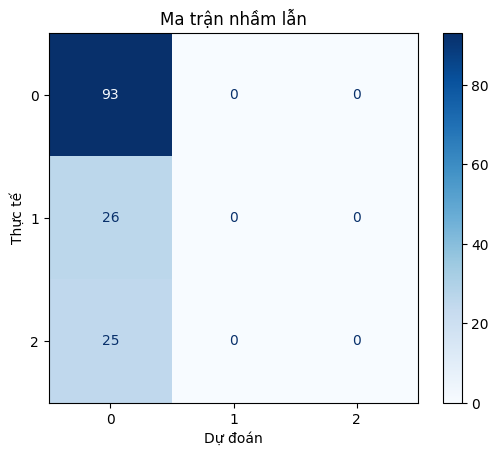

In [ ]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_lstm)

# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap='Blues')
plt.title('Ma trận nhầm lẫn')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

In [94]:
print(classification_report(y_test, y_pred_lstm, target_names=['Hold (0)', 'Buy (1)', 'Sell (2)']))

              precision    recall  f1-score   support

    Hold (0)       0.65      1.00      0.78        93
     Buy (1)       0.00      0.00      0.00        26
    Sell (2)       0.00      0.00      0.00        25

    accuracy                           0.65       144
   macro avg       0.22      0.33      0.26       144
weighted avg       0.42      0.65      0.51       144



Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


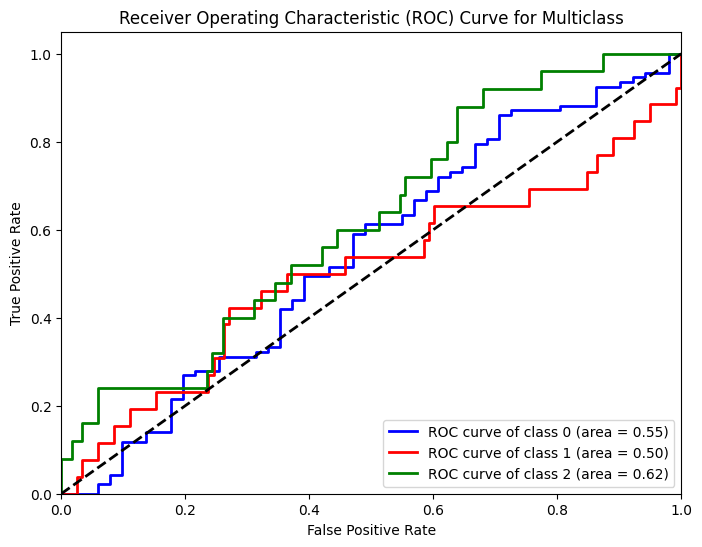

In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Assuming you have y_test_all and the predicted probabilities from your model
# Replace y_pred_proba_xgb with the actual predicted probabilities
# Example: y_pred_proba_xgb = xgb_model.predict_proba(X_test_all)[:, 1]
y_pred_proba_lstm = lstm_model.predict(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_lstm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust colors if needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()

# Model Hybrid

In [96]:
input_shape = (3, len(features))  # Cập nhật len(features) với số lượng đặc trưng của bạn
hybrid_model = build_hybrid_model(input_shape) # Build model
hybrid_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 3, 102)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (RNN)                     │ (None, 3, 64)          │        10,626 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 3, 100)         │        46,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,429 (497.77 KB)

 Trainable params: 127,429 (497.77 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
hybrid_model.load_weights("/home/Trong/FundamentalAnalysisAndSentimentAnalysis/stock_trading_strategy/PredictStock_TA_FA_SA/TA_FA_SA/v1/model/model_TA_FA_SA_hybrid_v1.keras")

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 


In [98]:
y_train_oh = to_categorical(y_train, num_classes=3)
y_test_oh = to_categorical(y_test, num_classes=3)

In [99]:
loss, accuracy = hybrid_model.evaluate(X_test_scaled, y_test_oh, verbose=1)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6429 - loss: 0.9588
Loss: 0.9718
Accuracy: 0.6111


In [100]:
# Nếu output là xác suất (sử dụng softmax), cần lấy chỉ số nhãn lớn nhất
y_pred_probs = hybrid_model.predict(X_test_scaled[0:1])
y_pred = np.argmax(y_pred_probs, axis=1)  # Chọn lớp có xác suất cao nhất
y_pred_probs

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


array([[0.40953314, 0.24901691, 0.34145   ]], dtype=float32)

In [101]:
# Nếu output là xác suất (sử dụng softmax), cần lấy chỉ số nhãn lớn nhất
y_pred_probs = hybrid_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)  # Chọn lớp có xác suất cao nhất
y_pred_probs

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


array([[0.4095331 , 0.2490169 , 0.34145   ],
       [0.41853324, 0.2390511 , 0.34241557],
       [0.39886144, 0.25107378, 0.35006484],
       [0.38698277, 0.2583171 , 0.35470015],
       [0.4026595 , 0.24592212, 0.3514184 ],
       [0.38736972, 0.2560397 , 0.35659054],
       [0.4015085 , 0.24877864, 0.34971285],
       [0.46367744, 0.215436  , 0.3208865 ],
       [0.48309308, 0.20793824, 0.30896866],
       [0.47743687, 0.21277672, 0.30978635],
       [0.41856918, 0.24008347, 0.3413473 ],
       [0.41155672, 0.24185467, 0.3465886 ],
       [0.47083592, 0.20987618, 0.3192879 ],
       [0.45016608, 0.22149032, 0.3283436 ],
       [0.49816555, 0.20001443, 0.30182004],
       [0.52646184, 0.20238659, 0.2711516 ],
       [0.40726608, 0.26758808, 0.32514578],
       [0.45378482, 0.26696587, 0.27924937],
       [0.49075156, 0.24796158, 0.26128685],
       [0.61207986, 0.19943596, 0.18848419],
       [0.597559  , 0.20280486, 0.19963624],
       [0.5380677 , 0.23160169, 0.23033065],
       [0.

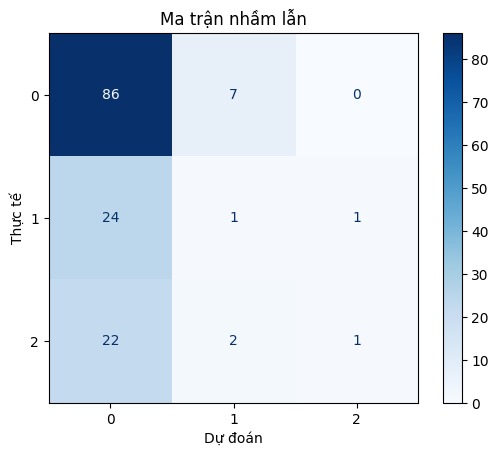

In [ ]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap='Blues')
plt.title('Ma trận nhầm lẫn')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

In [103]:
print(classification_report(y_test, y_pred, target_names=['Hold (0)', 'Buy (1)', 'Sell (2)']))

              precision    recall  f1-score   support

    Hold (0)       0.65      0.92      0.76        93
     Buy (1)       0.10      0.04      0.06        26
    Sell (2)       0.50      0.04      0.07        25

    accuracy                           0.61       144
   macro avg       0.42      0.33      0.30       144
weighted avg       0.53      0.61      0.52       144

